In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [12]:
df = pd.read_csv('../../../piw-amw-route-choice-calibration-fixed_routes_usage.csv')
df = df.drop(columns=["route"])
df = df.transpose()
df = df.loc[:, (df.max(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.head()

,beta,3,21,23,38,41,59,63,80,81,...,596,597,599,610,613,627,629,634,646,647
0,0.1,0.002303,0.003291,0.000658,0.002962,0.003291,0.006581,0.001974,0.005923,0.005265,...,0.043106,0.005265,0.002962,0.002632,0.004278,0.003291,0.010201,0.003620,0.037512,0.040474
1,0.2,0.003949,0.004607,0.002303,0.004278,0.007897,0.005923,0.003620,0.005923,0.007897,...,0.045081,0.003291,0.003620,0.003949,0.003620,0.003949,0.011188,0.005923,0.037512,0.040474
2,0.3,0.005594,0.004936,0.004278,0.002632,0.004278,0.009872,0.006910,0.005923,0.006581,...,0.044093,0.002962,0.004278,0.004278,0.004936,0.003620,0.011188,0.008885,0.037512,0.040474
3,0.4,0.009214,0.004278,0.003949,0.003291,0.005923,0.011517,0.007239,0.005923,0.007897,...,0.045410,0.003949,0.003949,0.006581,0.006252,0.003620,0.010859,0.008555,0.037512,0.040474
4,0.5,0.006252,0.007239,0.005923,0.001974,0.006252,0.011846,0.005923,0.005594,0.007568,...,0.044423,0.002632,0.008555,0.003949,0.005923,0.005265,0.011517,0.011188,0.037512,0.040474


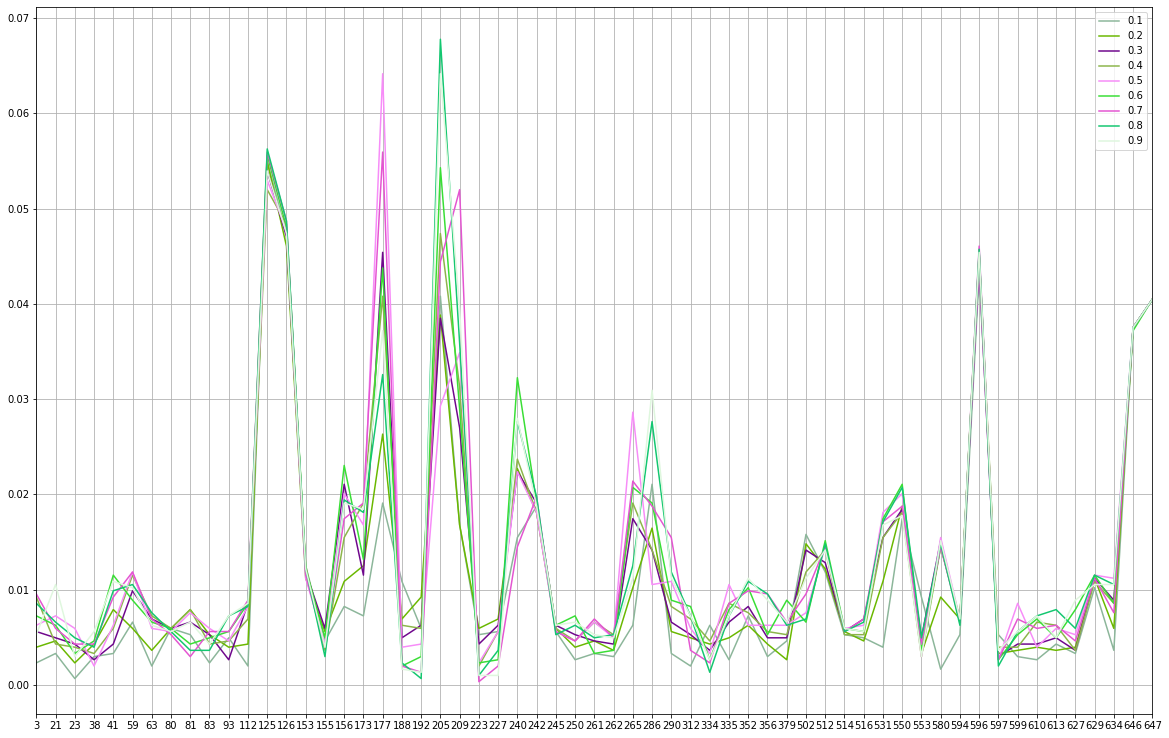

In [13]:
plt.figure(figsize=(20,13))
parallel_coordinates(df, 'beta', axvlines= False)
plt.show()